# Oluwadabira Omotoso

## How has the gender gap in literacy changed?

Based on the ongoing discussion about equality, I would like to see if there is a gender gap in literacy rates and how that has changed over time. Analysing this also reveals whether or not we are progressing towards equality.

To answer my research question, I plan to use some kind of chart that can show the disparity that existed between men and women over a certain period. Furthermore, I would like to explore the potential disparities in the literacy rate between men and women among the different continents. Additionally, I would calculate the mean when collating the data for men and women for each continent and the years chosen.

**Additional research questions:**
- Concerning certain regions, which gender is known to have a higher literacy rate?
- Does religion play a role in the literacy rate? Is there a particular gender that is more educated?
- What is the effect of wealth on literacy rate among a particular gender?
- As the level of education rises, has there been a decreased trend of literacy rate for a certain gender?

My analysis plan is answering the additional research questions to get an indepth analysis of the gender gap in literacy rate. I feel answering the additional research questions gives reason for me to come up with an accurate conclusion. 

## Loaded raw dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from joypy import joyplot
from pandas.api.types import CategoricalDtype
sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
data = pd.read_csv("../data/raw/dataset_raw.csv")

/var/folders/yd/8dvmmvhs6h17pc2r3tybl1040000gn/T/ipykernel_38398/2294406380.py:11: DtypeWarning: Columns (12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/raw/dataset_raw.csv")


## Columns in the dataset that I want to do EDA on:

In [6]:
a= len(data.columns)
df=data.drop(data.iloc[:,62:a],axis=1 )
df=df.drop(data.iloc[:,37:44],axis=1)
df.columns

Index(['iso_code', 'region_group', 'income_group', 'country', 'survey', 'year',
       'level', 'grade', 'category', 'Sex', 'Location', 'Wealth', 'Region',
       'Ethnicity', 'Religion', 'Language', 'comp_prim_v2_m',
       'comp_lowsec_v2_m', 'comp_upsec_v2_m', 'comp_prim_1524_m',
       'comp_lowsec_1524_m', 'comp_upsec_2029_m', 'eduyears_2024_m',
       'edu2_2024_m', 'edu4_2024_m', 'eduout_prim_m', 'eduout_lowsec_m',
       'eduout_upsec_m', 'comp_prim_v2_no', 'comp_lowsec_v2_no',
       'comp_upsec_v2_no', 'comp_prim_1524_no', 'comp_lowsec_1524_no',
       'comp_upsec_2029_no', 'eduyears_2024_no', 'edu2_2024_no',
       'edu4_2024_no', 'edu0_prim_m', 'edu0_prim_no', 'trans_prim_m',
       'trans_prim_no', 'trans_lowsec_m', 'trans_lowsec_no',
       'comp_higher_2yrs_2529_m', 'comp_higher_2yrs_2529_no',
       'comp_higher_4yrs_2529_m', 'comp_higher_4yrs_2529_no',
       'comp_higher_4yrs_3034_m', 'comp_higher_4yrs_3034_no',
       'attend_higher_1822_m', 'attend_higher_1822_no', 

#### Sub Question 1: Concerning certain regions, which gender is known to have a higher literacy rate?

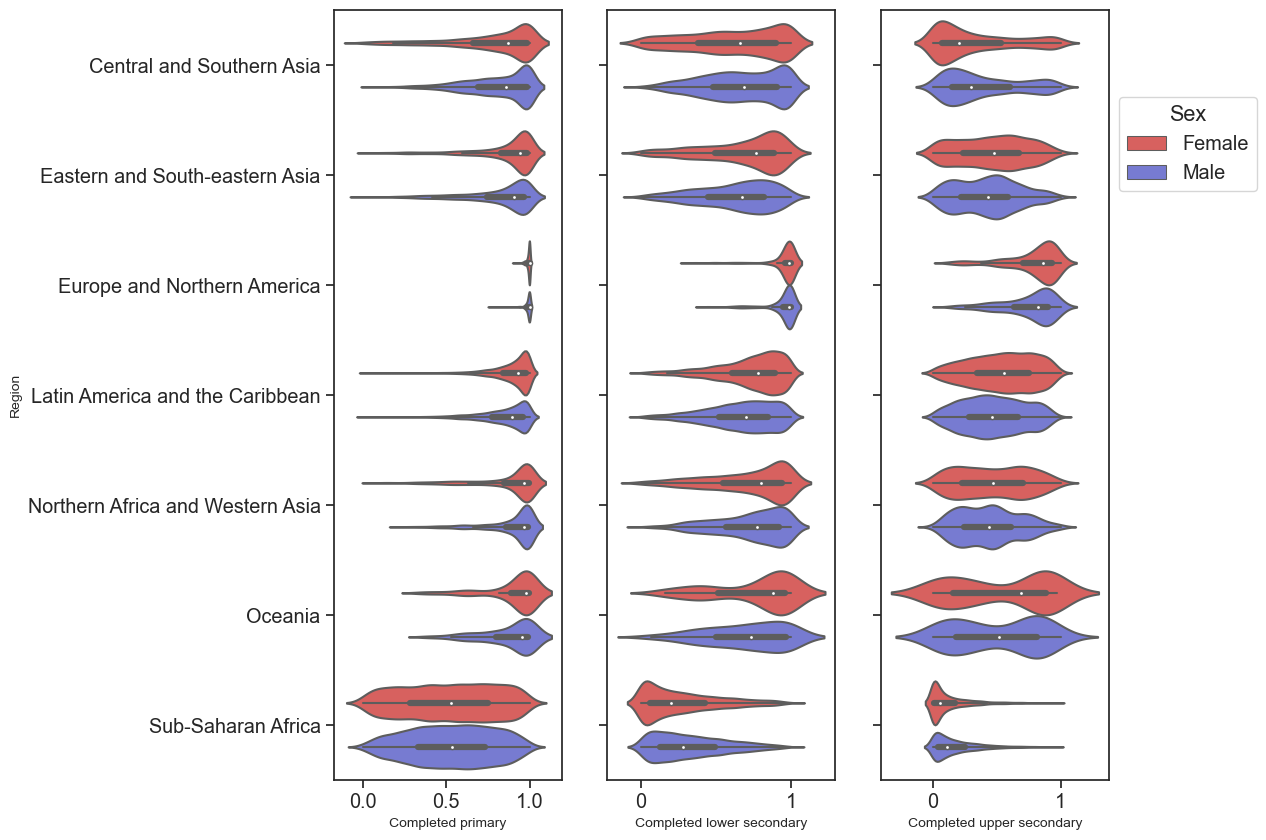

<Figure size 1000x1000 with 0 Axes>

In [111]:
f, axes = plt.subplots(ncols=3,sharex='col', sharey='row')
plt.rcParams["figure.figsize"] = [10.00,10.00]
plt.rc('axes', labelsize=10)
# plt.title("Region vs Gender who completed all levels of education(Higher Secondary)",loc='center')
my_pal = {sex: '#eb4d4b' if sex == "Female" else '#686de0' for sex in df["Sex"].unique()}
sns.violinplot(x=df['comp_prim_v2_m'],y=df['region_group'].sort_values(),hue=df['Sex'],ax=axes[0],palette=my_pal)
sns.violinplot(x=df['comp_lowsec_v2_m'],y=df['region_group'].sort_values(),hue=df['Sex'],ax=axes[1],palette=my_pal)
sns.violinplot(x=df['comp_upsec_v2_m'],y=df['region_group'].sort_values(),hue=df['Sex'],ax=axes[2],palette=my_pal)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[2].legend(bbox_to_anchor=[1,0.9],loc='upper left',title='Sex')
axes[0].set(ylabel='Region',xlabel="Completed primary")
axes[1].set(ylabel=None,xlabel="Completed lower secondary")
axes[2].set(ylabel=None,xlabel="Completed upper secondary")

plt.show()
sns.despine(trim=True, left=True)

From the dataset plotted above, the purpose of the various boxplots is to compare if there is a significant gap in the gender that completed primary school, lower secondary and upper secondary. The values in the x axis reflect a percentage.
- For Central and Southern Asia, the male and female attendance started off the same but there was a significant drop of female attendance when it came to completing upper secondary.
- For Subsaharan Africa, overall there was a significant drop in completing upper secondary. However, when comparing genders, the females that completed lower secondary school was much lower than the male.
- For Europe and North America, there was no significant change for both genders. However, for completion of upper secondary, the completion of males in secondary reduced.
- For Northern Africa, the male attendance dropped in lower secondary and uppersecondary
- For Latin America and the Carribean, the male attendance dropped as it went from primary to upper secondary
- For Oceania, there was a significant difference in the medians for completion of lower secondary and upper secondary
- For Eastern and South-eastern Asia, there was not wide gap in the medians for completion of each level. However, it was noticable the male completion reduced compared to females.

#### Sub Question 2: Does religion play a role in the literacy rate? Is there a particular gender that is more educated?

In [5]:
plt.figure()
df.index
a=pd.DataFrame(df.pivot_table(index='Religion', columns='Sex', values='literacy_1524_m'))
a=a.dropna()
a['Religion']= a.index
religion_list = CategoricalDtype(list(a.index))
a['Religion'] = a['Religion'].astype(religion_list)
a


Sex,Female,Male,Religion
Religion,,,
Adventist,0.817925,0.874675,Adventist
Anglican,0.938157,0.819750,Anglican
Animist,0.279267,0.659900,Animist
Apostolic Sect,0.945900,0.905700,Apostolic Sect
Assembly Of God,0.666100,0.886700,Assembly Of God
Buddhist,0.850731,0.901780,Buddhist
Catholic,0.771216,0.864651,Catholic
Celestes (Celestial Church Of Christ),0.412900,0.750100,Celestes (Celestial Church Of Christ)
Charismatic,0.981100,0.945800,Charismatic


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

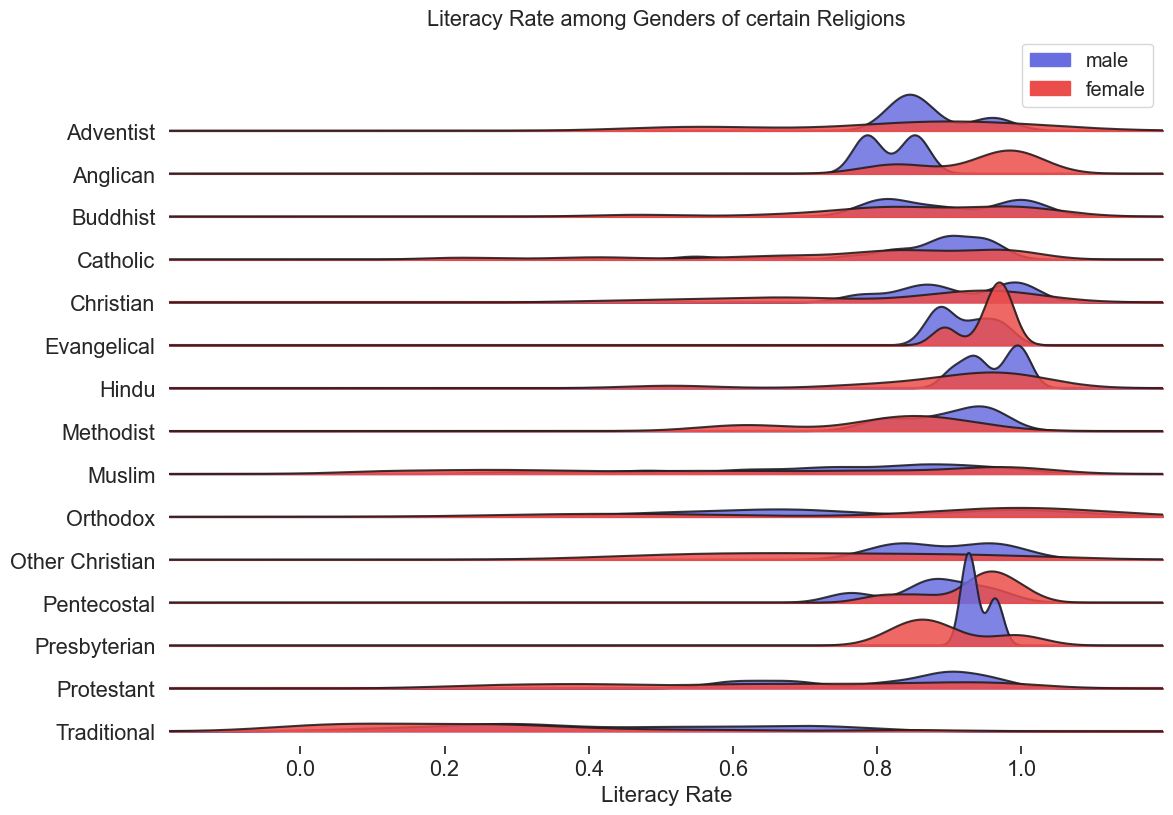

In [115]:
male_df = df[df['Sex'] == 'Male'][['literacy_1524_m', 'Religion']]
female_df = df[df['Sex'] == 'Female'][['literacy_1524_m', 'Religion']]

male_df = df[df['Sex'] == 'Male'].rename(columns={'literacy_1524_m': 'male'}).dropna(subset=['Religion','male'])
female_df = df[df['Sex'] == 'Female'].rename(columns={'literacy_1524_m': 'female'}).dropna(subset=['Religion','female'])

result_df = pd.merge(male_df[['Religion','male']], female_df[['Religion','female']], how='outer', on='Religion').dropna()


result_df = result_df.groupby('Religion').filter(lambda x: x['male'].nunique() > 1 and x['female'].nunique() > 1)


plt.figure()
ax,fig = joyplot(data=result_df[['male','female','Religion']],
        by=result_df['Religion'],
        column=['male','female'],
        color=['#686de0','#eb4d4b'], 
        legend=True,
        alpha = 0.85,
        figsize=(12,8)
                )
plt.rc('axes', labelsize=16)
plt.title('Literacy Rate among Genders of certain Religions')
plt.xlabel("Literacy Rate")
plt.show()

#### Sub Question 3: What is the effect of wealth on literacy rate among a particular gender?

[Text(0.5, 0, 'Literacy rate')]

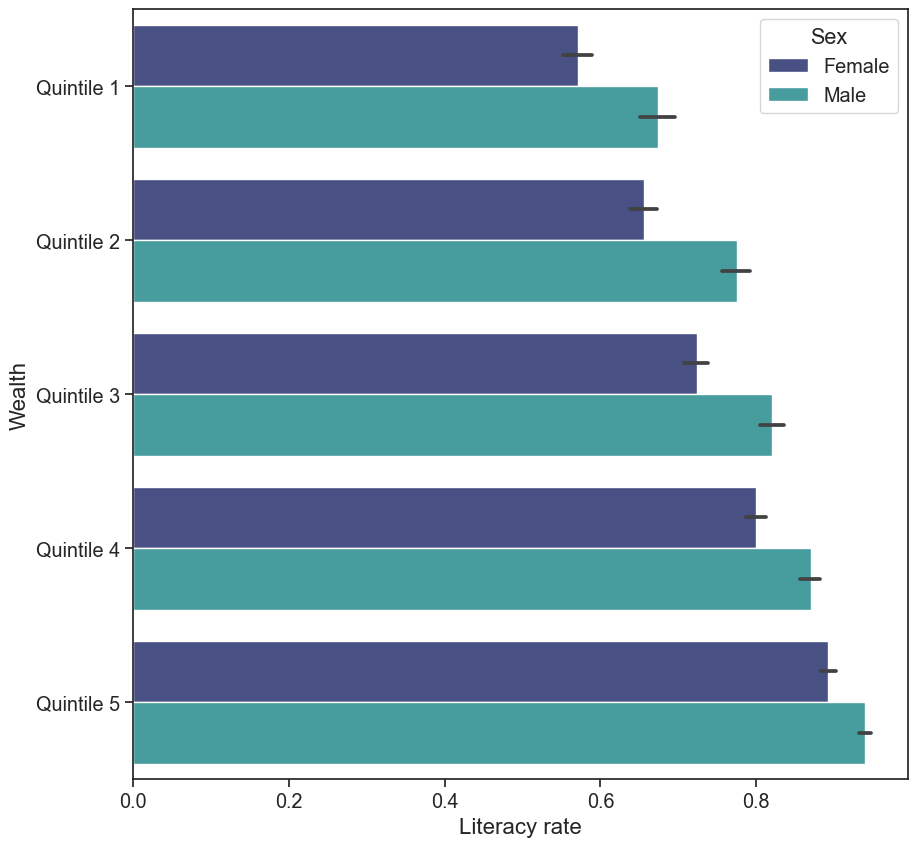

In [117]:
b= df.dropna(subset=['Wealth'])
# Wealth, literacy rate and gender
# radial bar plot explaining each quantile
# another graph thing that compares the trend among the quantiles
sns.barplot(x=b['literacy_1524_m'],hue=b['Sex'], y=b['Wealth'],palette='mako').set(xlabel='Literacy rate')

Looking at this bar chart which contains the mean literacy rate of concerning certain wealth levels and a particular gender, there are some changes but not that significant meaning that wealth has no significant effect on a particular gender's literacy rate. Looking at all these quintiles which range from poorest to richest, the noticeable trend is that the females have a lower literac rate.

In [27]:
pivot = data.pivot_table(index="Wealth", columns="Sex", values="literacy_1524_m").reset_index()
pivot
# d = pivot[pivot[0] == quintile]

Sex,Wealth,Female,Male
0,Quintile 1,0.570677,0.673186
1,Quintile 2,0.655319,0.775114
2,Quintile 3,0.723501,0.820460
3,Quintile 4,0.799195,0.869807
4,Quintile 5,0.892428,0.939634


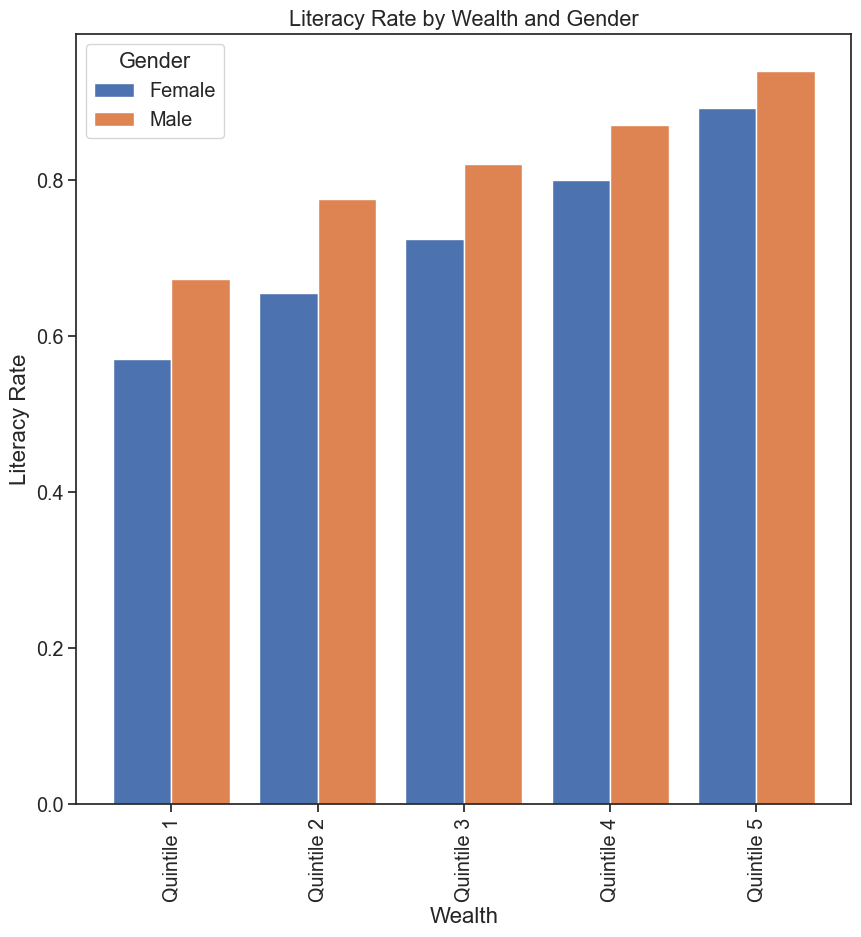

In [121]:
# Plot the pivot table as a grouped bar chart
pivot.plot(kind="bar", width=0.8)
plt.title("Literacy Rate by Wealth and Gender")
plt.xlabel("Wealth")
plt.ylabel("Literacy Rate")
plt.legend(title="Gender")
plt.show()

IndexError: list index out of range

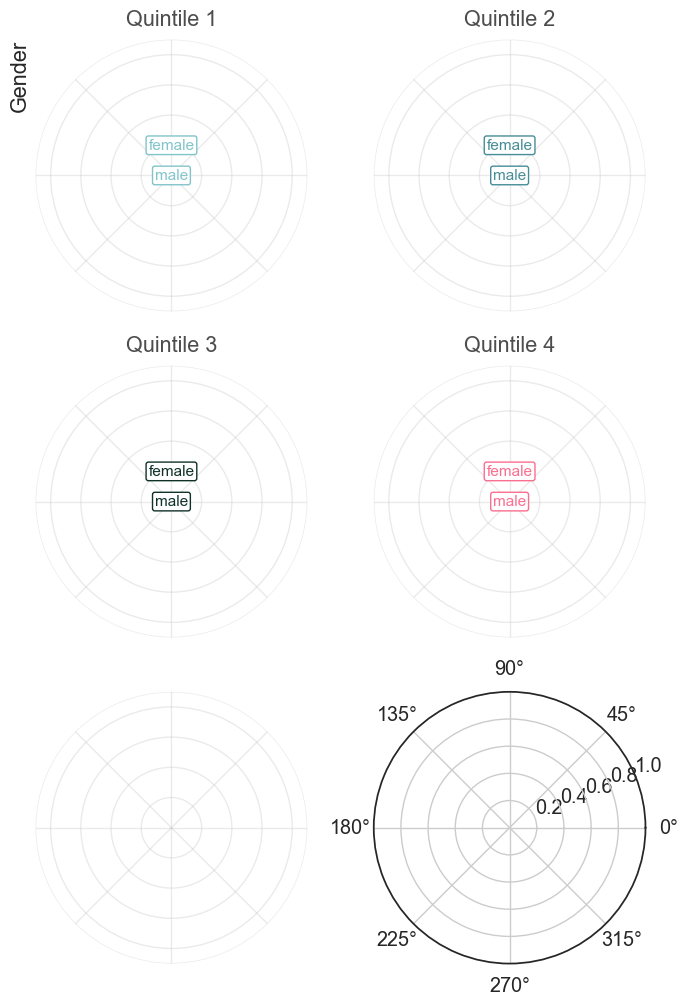

In [34]:
WEALTH_PALETTES = ["#81C4CA", "#468D96", "#103128", "#FA6E90", "#FCB16D"]

def style_polar_axis(ax):
    # Change the initial location of the 0 in radians
    ax.set_theta_offset(np.pi / 2)
    
    # Move in clock-wise direction 
    ax.set_theta_direction(-1)

    # Remove all spines
    ax.set_frame_on(False)

    # Don't use tick labels for radial axis
    ax.set_xticklabels([])
    
    # Set limits for y axis
    ax.set_ylim([0, 4.5])
    # Set ticks for y axis. These determine the grid lines.
    ax.set_yticks([0, 1, 2, 3, 4, 4.5])
    # But don't use tick labels
    ax.set_yticklabels([])
    
    # Set grid with some transparency
    ax.grid(alpha=0.4)

    return ax

def add_labels_polar_axis(ax, color):
    # Define the characteristics of the bbox behind the text we add
    bbox_dict = {
        "facecolor": "w", "edgecolor": color, "linewidth": 1, 
        "boxstyle": "round", "pad": 0.15
    }
    gender = ["male", "female"]
    # Iterate over types of gender and add the labels
    for idx, gen in enumerate(gender):
        ax.text(
            0, idx, gen, color=color, ha="center", va="center",
            fontsize=11, bbox=bbox_dict
        )
    return ax
def plot_circular(axes):
    axes_flattened = axes.ravel()
    wealth = pivot['Wealth']
    
    # Iterate over wealth quintiles and plots
    for i, quintile in enumerate(wealth):
        # Select data for the given quintile
        d = pivot[pivot['Wealth'] == quintile]
        
        # Select plot
        ax = axes_flattened[i]
        
        # Only for the first panel, add label for vertical axis
        if i == 0:
            ax.set_ylabel("Gender", loc="top")
        
        # Adjust style of the plot
        ax = style_polar_axis(ax)
        
        # Multiply the proportion by the 2pi, the complete rotation 
        proportions = d["Male"].values * (2 * np.pi)
        
        # Positions for the lines on the radial
        y_pos = np.arange(len(proportions))
        
        # Construct the line for each type of plastic creating a grid for the x and y values
        x = np.linspace(0, proportions, num=200)
        y = np.vstack([y_pos] * 200)

        # Select color
        color = WEALTH_PALETTES[i]
        
        # And finally, plot the rounded lines
        ax.plot(x, y, lw=6, color=color, solid_capstyle="round")
        
        # Add title
        ax.set_title(quintile, pad=10, color="0.3")
        
        # Add labels on top of the lines
        ax = add_labels_polar_axis(ax, color)
    return axes
# Initialize layout
fig, axes = plt.subplots(3, 2, figsize=(8, 12), subplot_kw={"projection": "polar"})

# Create chart! 
axes = plot_circular(axes)

#### General correlation of Gender and literacy rate all over the world

/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/oluwadabiraomotoso/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<AxesSubplot: xlabel='literacy_1524_no', ylabel='region_group'>

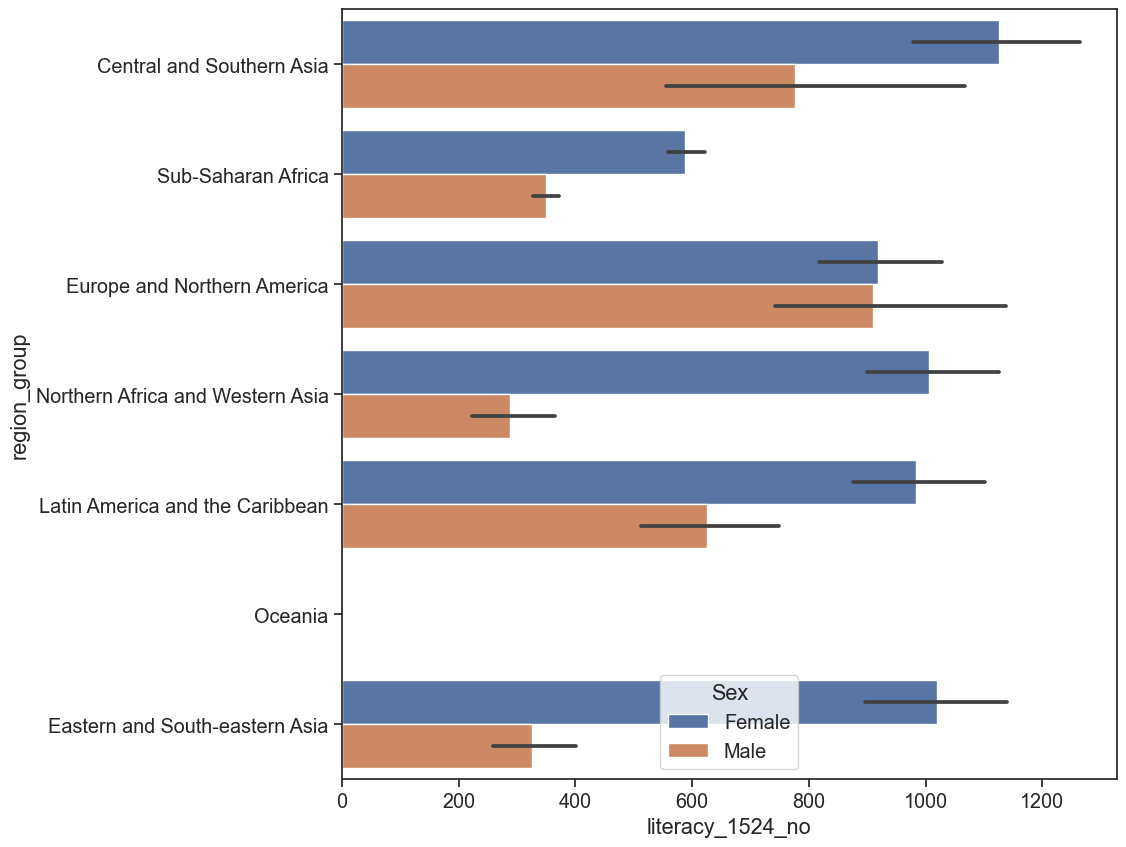

In [38]:
sns.barplot(x=df['literacy_1524_no'],hue=df['Sex'], y=df['region_group'])

From the graph above, it shows that there is a significant gender gap in the literacy rate. However, the change seen was that female had a higher literacy rate for all regions compared to men. 